In [215]:
import torch
import torch.nn as nn
import numpy as np
import cv2
import matplotlib.pyplot as plt
from torchvision.models import resnet18

from graphviz import Digraph
from torch.autograd import Variable

from torchviz import make_dot

In [2]:
resnet=resnet18(pretrained=True)

In [127]:
class Classifer(nn.Module):
    def __init__(self, arc):
        super().__init__()
        self.new_classifer=nn.Sequential(*list(arc.children())[:-1])

    def forward(self, x):
        out=self.new_classifer(x)
        out=out.view(-1,out.numel())
        out=nn.Linear(512,1000)(out)
        return out

In [128]:
net=Classifer(resnet)

In [129]:
inp=torch.randn(3,214,214)
inp=inp.unsqueeze(0)

In [131]:
result=net(inp)

In [132]:
result.shape

torch.Size([1, 1000])

In [173]:
for i,j in resnet.named_children():
    print(f'****** {i}')


****** conv1
****** bn1
****** relu
****** maxpool
****** layer1
****** layer2
****** layer3
****** layer4
****** avgpool
****** fc


In [137]:
for k ,v in resnet.children():
    print (k)

TypeError: 'Conv2d' object is not iterable

In [204]:
class Modified(nn.Module):
    def __init__(self,to_store,dicts):
        super().__init__()
        for key,val in dicts.named_children():
            if key=='avgpool' or key=='fc':
                continue
            else:
                self.add_module(key, val)
        self._store=to_store
    
    def forward(self,x):
        empty=[]
        print(self._modules)
        for name, clas in self._modules.items():
            x=clas(x)
            if name in self._store:
                empty.append(x)
        return empty

In [205]:
class Ne_check(nn.Module):
    def __init__(self,arc):
        super().__init__()
        self.features=Modified(['conv1'],arc)
    def forward(self, x):
        out=self.features(x)
        return out

In [206]:
fil=Ne_check(resnet)

In [207]:
fil_see=fil(inp)

OrderedDict([('conv1', Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)), ('bn1', BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)), ('relu', ReLU(inplace=True)), ('maxpool', MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)), ('layer1', Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Con

In [210]:
fil_see[0].shape

torch.Size([1, 64, 107, 107])

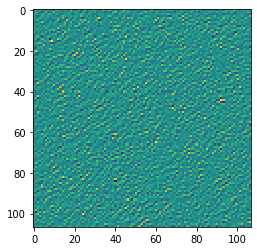

In [213]:
plt.imshow(fil_see[0][0][63].data)

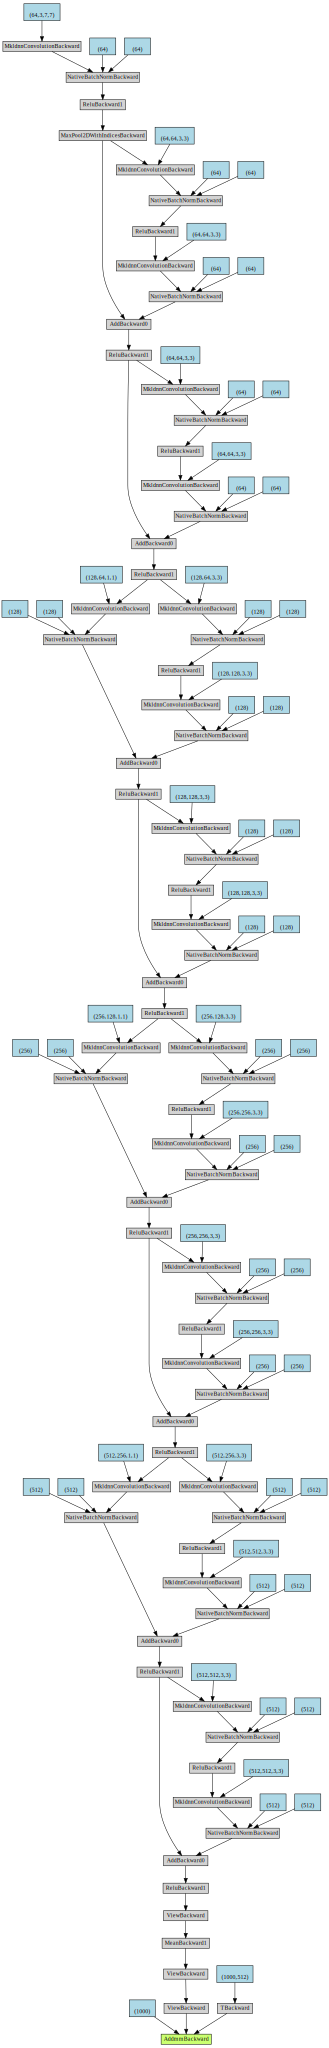

In [219]:
make_dot(result)